<a target="_blank" href="https://colab.research.google.com/github/phitter-core/phitter-kernel/blob/main/examples/working_distribution.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TUTORIAL: WORKING SPECIFIC DISTRIBUTION**

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy
import pandas
import plotly.graph_objects as go

In [2]:
plt.style.use("ggplot")

In [3]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../")

In [4]:
import phitter

**Initializes distribution providing a dict with patameters specified in documentation**

<img alt="phitter_histogram" src="https://github.com/phitter-core/phitter-kernel/blob/main/multimedia/working_distributions.png?raw=true" width="1000" />


In [5]:
distribution = phitter.continuous.Normal({"mu": 5, "sigma": 2})

**Cumulative distribution function**

In [6]:
distribution.cdf(3.56446)

np.float64(0.2364495569443788)

**Probability density function**

In [7]:
distribution.pdf(3.56446)

np.float64(0.1541725883965463)

**Percent point function**

In [8]:
distribution.ppf(0.6344)

np.float64(5.6870594036440725)

**Sample**

In [9]:
data = distribution.sample(1000)

**Stats**

In [ ]:
distribution_stats = {
    "mean": distribution.mean,
    "variance": distribution.variance,
    "skewness": distribution.skewness,
    "kurtosis": distribution.kurtosis,
    "median": distribution.median,
    "mode": distribution.mode,
}

df = pandas.DataFrame(list(distribution_stats.items()), columns=["Statistic", "Value"])
df

,Statistic,Value
0,mean,5.0
1,variance,6.0
2,skewness,0.0
3,kurtosis,3.0
4,median,5.0
5,mode,5.0


**Plot histogram**

In [ ]:
densities_frequencies, bin_edges = numpy.histogram(data, density=True)
central_values = (bin_edges[:-1] + bin_edges[1:]) / 2

In [ ]:
x_plot = numpy.linspace(numpy.min(data), numpy.max(data), 1000)
y_plot = distribution.pdf(x_plot)

**Plotly**

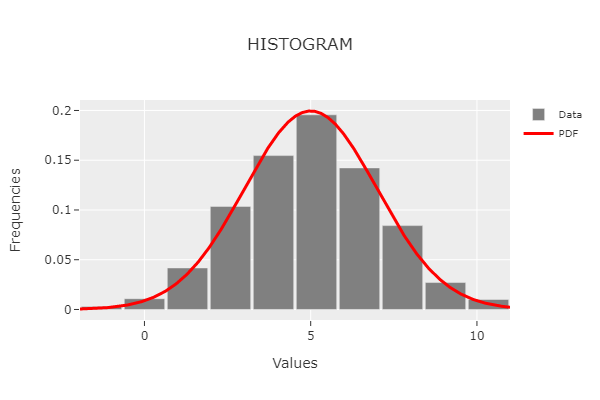

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=central_values, y=densities_frequencies, marker_color="gray", name="Data"))
# fig.add_trace(go.Histogram(x=data, marker_color="gray", histnorm="probability density", name="Hist"))
fig.add_trace(go.Scatter(x=x_plot, y=y_plot, mode="lines", line=dict(color="red", width=3), name="PDF"))

fig.update_layout(
    height=400,
    width=600,
    title="HISTOGRAM",
    xaxis_title="Values",
    yaxis_title="Frequencies",
    template="ggplot2",
    legend=dict(orientation="v", yanchor="auto", y=1, xanchor="left", font=dict(size=10)),
    bargap=0.06,
)

fig.show()

**Matplotlib**

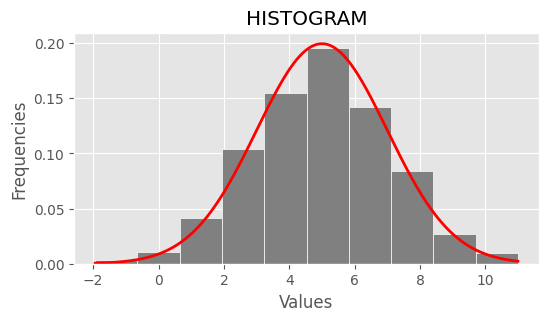

In [ ]:
plt.figure(figsize=(6, 3))
plt.hist(data, density=True, ec="white", color="gray")
plt.title("HISTOGRAM")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.plot(x_plot, y_plot, label=f"PDF", color="red", linewidth=2)
plt.show()